In [11]:
import pandas as pd
import numpy as np

In [75]:
df = pd.read_csv('/content/spam.csv', encoding='latin-1')

In [76]:
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [77]:
# Data cleaning
# EDA
# text preprocessing
# Model building
# evaluation
# improvement
# website

In [78]:
# data cleaning

In [79]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [80]:
df.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'], inplace=True)

In [81]:
df.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [82]:
df.rename(columns={'v1':'target', 'v2':'text'},inplace=True)

In [83]:
df.head()

,target,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [84]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [85]:
df['target'] =  encoder.fit_transform(df['target'])

In [86]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [87]:
df.isnull().sum()

,0
target,0
text,0


In [88]:
df.duplicated().sum()

np.int64(403)

In [89]:
df = df.drop_duplicates(keep='first')

In [90]:
df.duplicated().sum()

np.int64(0)

In [91]:
df.shape

(5169, 2)

**EDA**

In [92]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [93]:
df['target'].value_counts()

,count
target,
0,4516
1,653


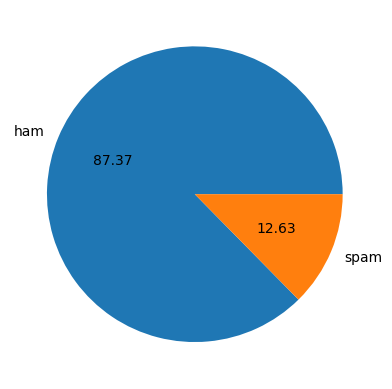

In [94]:
import matplotlib.pyplot as plt
plt.pie(df['target'].value_counts(), labels=['ham', 'spam'], autopct="%0.2f")
plt.show()

In [95]:
# Data is imbalanced

In [108]:
import nltk

In [109]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [110]:
df['num_characters']= df['text'].apply(len)

In [111]:
df.head()

,target,text,num_characters,num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,20
1,0,Ok lar... Joking wif u oni...,29,6
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,33
3,0,U dun say so early hor... U c already then say...,49,11
4,0,"Nah I don't think he goes to usf, he lives aro...",61,14


In [112]:
import re
df['word_count'] = df['text'].apply(lambda x: len(re.findall(r'\b\w+\b', x)))

In [113]:
df.head()

,target,text,num_characters,num_words,word_count
0,0,"Go until jurong point, crazy.. Available only ...",111,20,20
1,0,Ok lar... Joking wif u oni...,29,6,6
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,33,33
3,0,U dun say so early hor... U c already then say...,49,11,11
4,0,"Nah I don't think he goes to usf, he lives aro...",61,14,14


In [114]:
df.rename(columns={'word_count': 'num_words'}, inplace=True)


In [115]:
df.head()

,target,text,num_characters,num_words,num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,20,20
1,0,Ok lar... Joking wif u oni...,29,6,6
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,33,33
3,0,U dun say so early hor... U c already then say...,49,11,11
4,0,"Nah I don't think he goes to usf, he lives aro...",61,14,14


In [117]:
df['num_sentences'] = df['text'].apply(lambda x: len(re.findall(r'[.!?]', x)))

In [118]:
df.head()

,target,text,num_characters,num_words,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,20,20,8
1,0,Ok lar... Joking wif u oni...,29,6,6,6
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,33,33,1
3,0,U dun say so early hor... U c already then say...,49,11,11,6
4,0,"Nah I don't think he goes to usf, he lives aro...",61,14,14,0


In [119]:
df[['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_words,num_sentences
count,5169.000000,5169.000000,5169.000000,5169.000000
mean,78.977945,15.989940,15.989940,2.461018
std,58.236293,11.518372,11.518372,2.686481
min,2.000000,0.000000,0.000000,0.000000
25%,36.000000,8.000000,8.000000,1.000000
50%,60.000000,12.000000,12.000000,2.000000
75%,117.000000,23.000000,23.000000,3.000000
max,910.000000,190.000000,190.000000,42.000000


In [122]:
# for ham messages
df[df['target'] ==0][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_words,num_sentences
count,4516.000000,4516.000000,4516.000000,4516.000000
mean,70.459256,14.600974,14.600974,2.384190
std,56.358207,11.448193,11.448193,2.773408
min,2.000000,0.000000,0.000000,0.000000
25%,34.000000,7.000000,7.000000,1.000000
50%,52.000000,11.000000,11.000000,2.000000
75%,90.000000,19.000000,19.000000,3.000000
max,910.000000,190.000000,190.000000,42.000000


In [124]:
# for spam messages
df[df['target'] ==1][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_words,num_sentences
count,653.000000,653.000000,653.000000,653.000000
mean,137.891271,25.595712,25.595712,2.992343
std,30.137753,6.185684,6.185684,1.902114
min,13.000000,2.000000,2.000000,0.000000
25%,132.000000,24.000000,24.000000,2.000000
50%,149.000000,27.000000,27.000000,3.000000
75%,157.000000,29.000000,29.000000,4.000000
max,224.000000,40.000000,40.000000,13.000000


In [125]:
import seaborn as sns

<Axes: xlabel='num_characters', ylabel='Count'>

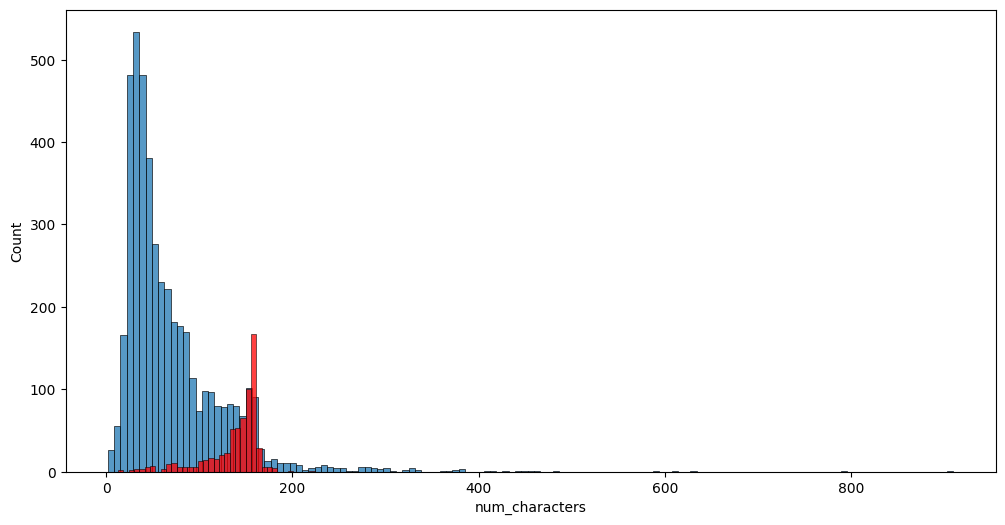

In [132]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['target'] ==0]['num_characters'])
sns.histplot(df[df['target'] ==1]['num_characters'],color='red')

<Axes: xlabel='num_characters', ylabel='Count'>

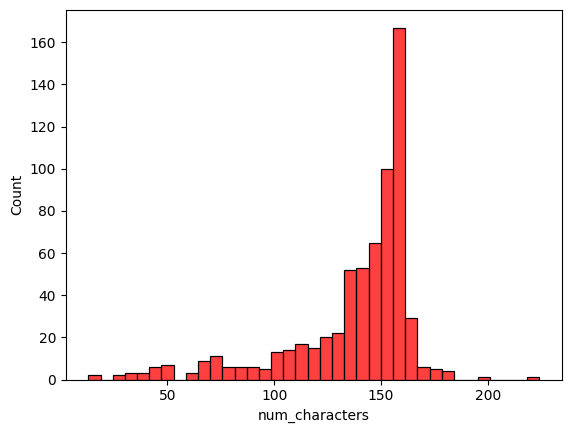

In [133]:
sns.histplot(df[df['target'] ==1]['num_characters'],color='red')

<Axes: ylabel='Count'>

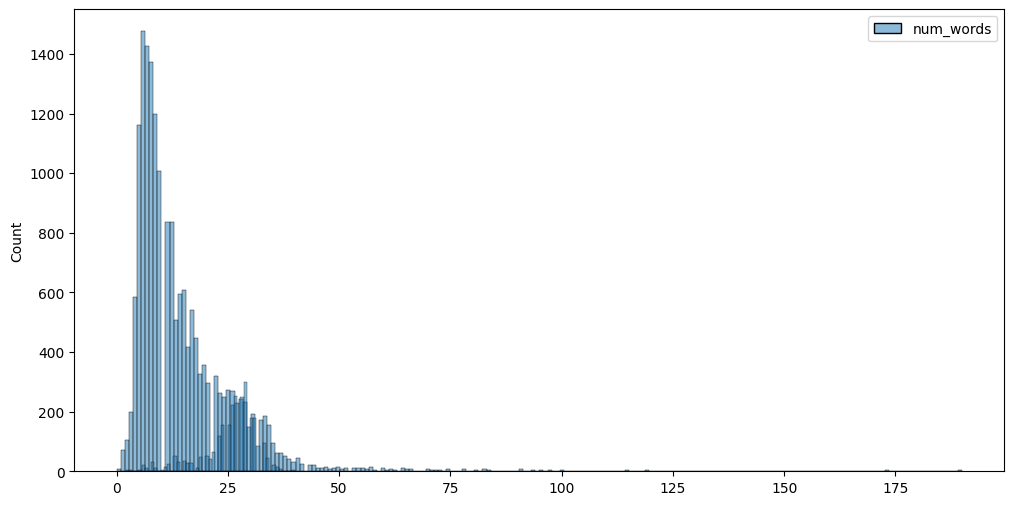

In [135]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['target'] ==0]['num_words'])
sns.histplot(df[df['target'] ==1]['num_words'],color='red')

In [137]:
df.head()

,target,text,num_characters,num_words,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,20,20,8
1,0,Ok lar... Joking wif u oni...,29,6,6,6
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,33,33,1
3,0,U dun say so early hor... U c already then say...,49,11,11,6
4,0,"Nah I don't think he goes to usf, he lives aro...",61,14,14,0


In [139]:
df.shape

(5169, 6)

In [140]:
df = df.loc[:,~df.columns.duplicated()]


In [141]:
df.head()

,target,text,num_characters,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,20,8
1,0,Ok lar... Joking wif u oni...,29,6,6
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,33,1
3,0,U dun say so early hor... U c already then say...,49,11,6
4,0,"Nah I don't think he goes to usf, he lives aro...",61,14,0


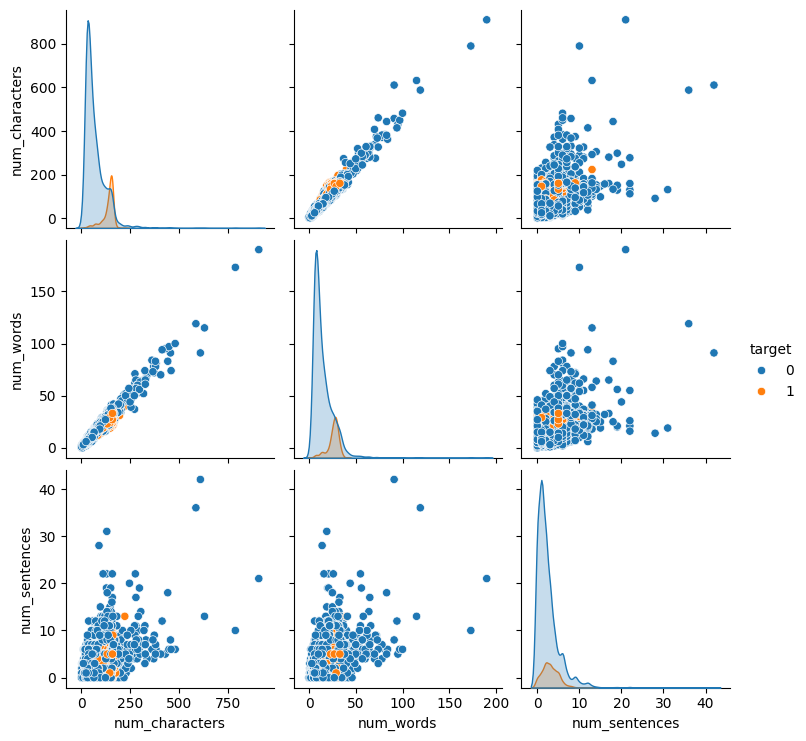

In [142]:
sns.pairplot(df, hue='target')

In [145]:
df

,target,text,num_characters,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,20,8
1,0,Ok lar... Joking wif u oni...,29,6,6
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,33,1
3,0,U dun say so early hor... U c already then say...,49,11,6
4,0,"Nah I don't think he goes to usf, he lives aro...",61,14,0
...,...,...,...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...,161,33,5
5568,0,Will Ì_ b going to esplanade fr home?,37,8,1
5569,0,"Pity, * was in mood for that. So...any other s...",57,10,5
5570,0,The guy did some bitching but I acted like i'd...,125,27,0


<Axes: >

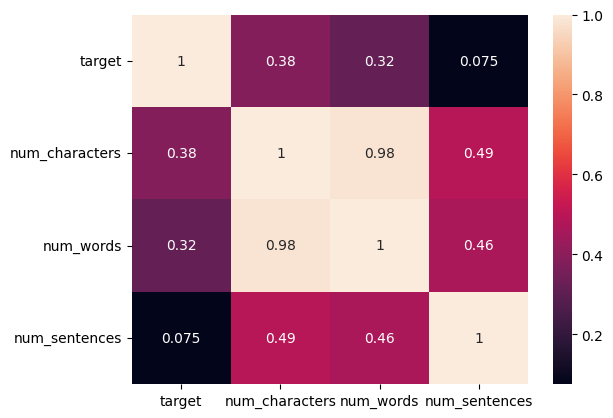

In [148]:
sns.heatmap(df.corr(numeric_only=True), annot=True)

***Data preprocessing***

In [168]:
import re
import string
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS
from nltk.stem.porter import PorterStemmer  # You can optionally remove this too

ps = PorterStemmer()

def transform_text(text):
    # Lowercase the text
    text = text.lower()

    # Tokenize using regex (extracts alphanumeric words only)
    tokens = re.findall(r'\b\w+\b', text)

    # Remove stopwords
    filtered = [word for word in tokens if word not in ENGLISH_STOP_WORDS]

    # Stemming
    stemmed = [ps.stem(word) for word in filtered]

    return " ".join(stemmed)


In [169]:
transform_text("Congratulations! You've won a FREE ticket to Bahamas!!! Click here.")

'congratul ve won free ticket bahama click'

In [170]:
transform_text("WINNER!! You have been selected for a $1000 Walmart gift card.")


'winner select 1000 walmart gift card'

In [171]:
transform_text('Did you Like my presentation on ML?')

'did like present ml'

In [172]:
transform_text("I'm still looking for a car to buy. And have not gone 4the driving test yet.")

'm look car buy gone 4the drive test'

In [173]:
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()
ps.stem('loving')


'love'

In [174]:
df['text'][101]

"I'm still looking for a car to buy. And have not gone 4the driving test yet."

In [175]:
df['transform_text'] = df['text'].apply(transform_text)

In [176]:
df.head()

,target,text,num_characters,num_words,num_sentences,transform_text
0,0,"Go until jurong point, crazy.. Available only ...",111,20,8,jurong point crazi avail bugi n great world la...
1,0,Ok lar... Joking wif u oni...,29,6,6,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,33,1,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,11,6,u dun say earli hor u c say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,14,0,nah don t think goe usf live


In [185]:
from wordcloud import WordCloud
wc = WordCloud(width=500, height=500, min_font_size=10, background_color='white')

In [186]:
spam_wc=wc.generate(df[df['target']==1]['transform_text'].str.cat(sep=' '))

In [187]:
spam_wc

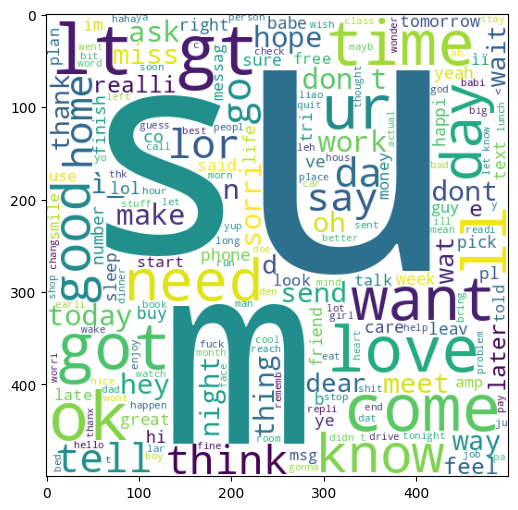

In [190]:
plt.figure(figsize=(15,6))
plt.imshow(spam_wc)

In [189]:
ham_wc=wc.generate(df[df['target']==0]['transform_text'].str.cat(sep=' '))

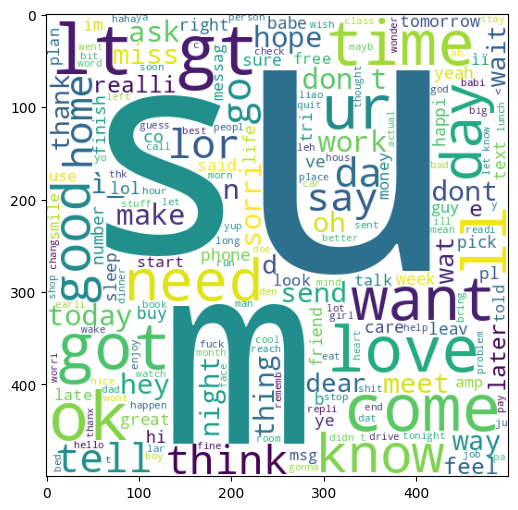

In [191]:
plt.figure(figsize=(15,6))
plt.imshow(ham_wc)

In [192]:
df.head()

,target,text,num_characters,num_words,num_sentences,transform_text
0,0,"Go until jurong point, crazy.. Available only ...",111,20,8,jurong point crazi avail bugi n great world la...
1,0,Ok lar... Joking wif u oni...,29,6,6,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,33,1,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,11,6,u dun say earli hor u c say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,14,0,nah don t think goe usf live


In [197]:
spam_corpus =[]
for msg in df[df['target']==1]['transform_text'].tolist():
  for word in msg.split():
    spam_corpus.append(word)

In [198]:
len(spam_corpus)

11402

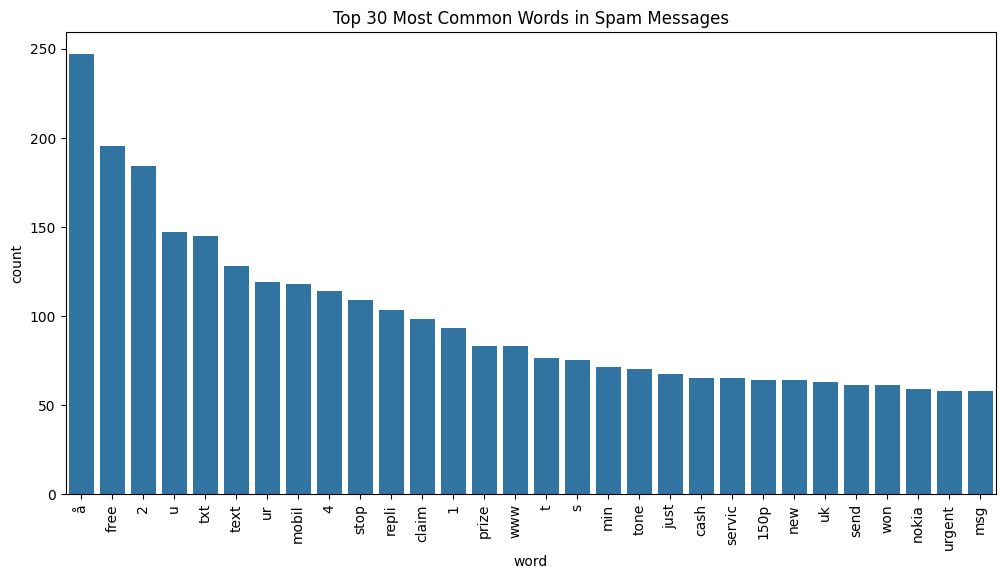

In [208]:
spam_freq_df = pd.DataFrame(Counter(spam_corpus).most_common(30), columns=['word', 'count'])

# Plot the word frequency bar chart
plt.figure(figsize=(12, 6))
sns.barplot(x='word', y='count', data=spam_freq_df)
plt.xticks(rotation='vertical')
plt.title('Top 30 Most Common Words in Spam Messages')
plt.show()

In [211]:
ham_corpus =[]
for msg in df[df['target']==0]['transform_text'].tolist():
  for word in msg.split():
    ham_corpus.append(word)

In [213]:
len(ham_corpus)

34958

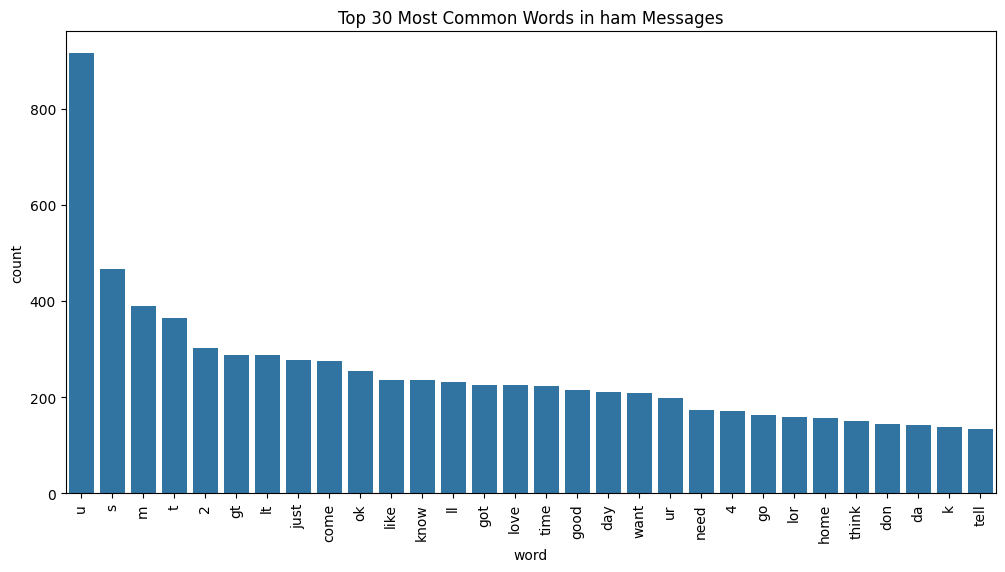

In [214]:
ham_freq_df = pd.DataFrame(Counter(ham_corpus).most_common(30), columns=['word', 'count'])

# Plot the word frequency bar chart
plt.figure(figsize=(12, 6))
sns.barplot(x='word', y='count', data=ham_freq_df)
plt.xticks(rotation='vertical')
plt.title('Top 30 Most Common Words in ham Messages')
plt.show()

**MODEL BUILDING**

In [303]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
tfidf = TfidfVectorizer()
cv  = CountVectorizer(max_features=3000)

In [304]:
X = tfidf.fit_transform(df['transform_text']).toarray()

In [305]:
# from sklearn.preprocessing import MinMaxScaler
# scalar = MinMaxScaler()
# X=scalar.fit_transform(X)

In [306]:
X

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [307]:
X.shape

(5169, 7115)

In [308]:
y = df['target'].values

In [309]:
y

array([0, 0, 1, ..., 0, 0, 0])

In [310]:
from sklearn.model_selection import train_test_split

In [311]:
X_train, X_test, y_train , y_test = train_test_split(X,y, test_size=0.2, random_state=2)

In [312]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score, precision_score, confusion_matrix

In [313]:
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [314]:
gnb.fit(X_train,y_train)
y_pred1 = gnb.predict(X_test)
print(accuracy_score(y_test, y_pred1))
print(confusion_matrix(y_test, y_pred1))
print(precision_score(y_test, y_pred1))

0.874274661508704
[[785 111]
 [ 19 119]]
0.5173913043478261


In [315]:
mnb.fit(X_train,y_train)
y_pred2 = mnb.predict(X_test)
print(accuracy_score(y_test, y_pred2))
print(confusion_matrix(y_test, y_pred2))
print(precision_score(y_test, y_pred2))

0.965183752417795
[[896   0]
 [ 36 102]]
1.0


In [316]:
bnb.fit(X_train,y_train)
y_pred3 = bnb.predict(X_test)
print(accuracy_score(y_test, y_pred3))
print(confusion_matrix(y_test, y_pred3))
print(precision_score(y_test, y_pred3))

0.9777562862669246
[[894   2]
 [ 21 117]]
0.9831932773109243


In [317]:
# tfidf with mnb

In [279]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

In [280]:
svc = SVC(kernel='sigmoid', gamma=1.0)
knc = KNeighborsClassifier()
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth=5)
lrc = LogisticRegression(solver='liblinear', penalty='l1')
rfc = RandomForestClassifier(n_estimators=50, random_state=2)
abc = AdaBoostClassifier(n_estimators=50, random_state=2)
bc = BaggingClassifier(n_estimators=50, random_state=2)
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)
gbdt = GradientBoostingClassifier(n_estimators=50,random_state=2)
xgb = XGBClassifier(n_estimators=50,random_state=2)


In [281]:
clfs = {
    'SVC' : svc,
    'KN' : knc,
    'NB': mnb,
    'DT': dtc,
    'LR': lrc,
    'RF': rfc,
    'AdaBoost': abc,
    'BgC': bc,
    'ETC': etc,
    'GBDT':gbdt,
    'xgb':xgb
}


In [282]:
def train_classifier(clf,X_train,y_train,X_test,y_test):
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test,y_pred)
    precision = precision_score(y_test,y_pred)

    return accuracy,precision

In [283]:
train_classifier(svc,X_train,y_train,X_test,y_test)

(0.9748549323017408, 0.9745762711864406)

In [260]:
accuracy_scores = []
precision_scores = []

for name,clf in clfs.items():

    current_accuracy,current_precision = train_classifier(clf, X_train,y_train,X_test,y_test)

    print("For ",name)
    print("Accuracy - ",current_accuracy)
    print("Precision - ",current_precision)

    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)

For  SVC
Accuracy -  0.9748549323017408
Precision -  0.9745762711864406
For  KN
Accuracy -  0.8965183752417795
Precision -  1.0
For  NB
Accuracy -  0.965183752417795
Precision -  1.0
For  DT
Accuracy -  0.9303675048355899
Precision -  0.9024390243902439
For  LR
Accuracy -  0.9526112185686654
Precision -  0.9405940594059405
For  RF
Accuracy -  0.971953578336557
Precision -  0.990990990990991
For  AdaBoost
Accuracy -  0.8994197292069632
Precision -  0.9047619047619048
For  BgC
Accuracy -  0.9680851063829787
Precision -  0.92
For  ETC
Accuracy -  0.9777562862669246
Precision -  0.9752066115702479
For  GBDT
Accuracy -  0.9516441005802708
Precision -  1.0
For  xgb
Accuracy -  0.9806576402321083
Precision -  0.9836065573770492


In [318]:
performance_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy':accuracy_scores,'Precision':precision_scores}).sort_values('Precision',ascending=False)

In [319]:
performance_df

,Algorithm,Accuracy,Precision
1,KN,0.896518,1.000000
2,NB,0.965184,1.000000
9,GBDT,0.951644,1.000000
5,RF,0.971954,0.990991
10,xgb,0.980658,0.983607
8,ETC,0.977756,0.975207
0,SVC,0.974855,0.974576
4,LR,0.952611,0.940594
7,BgC,0.968085,0.920000
6,AdaBoost,0.899420,0.904762


In [320]:
# model improve
# 1. Change the max_features parameter of TfIdf

In [321]:
temp_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_max_ft_3000':accuracy_scores,'Precision_max_ft_3000':precision_scores}).sort_values('Precision_max_ft_3000',ascending=False)

In [322]:
temp_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_scaling':accuracy_scores,'Precision_scaling':precision_scores}).sort_values('Precision_scaling',ascending=False)

In [323]:
new_df = performance_df.merge(temp_df,on='Algorithm')

In [324]:
new_df

,Algorithm,Accuracy,Precision,Accuracy_scaling,Precision_scaling
0,KN,0.896518,1.000000,0.896518,1.000000
1,NB,0.965184,1.000000,0.965184,1.000000
2,GBDT,0.951644,1.000000,0.951644,1.000000
3,RF,0.971954,0.990991,0.971954,0.990991
4,xgb,0.980658,0.983607,0.980658,0.983607
5,ETC,0.977756,0.975207,0.977756,0.975207
6,SVC,0.974855,0.974576,0.974855,0.974576
7,LR,0.952611,0.940594,0.952611,0.940594
8,BgC,0.968085,0.920000,0.968085,0.920000
9,AdaBoost,0.899420,0.904762,0.899420,0.904762


In [326]:
import pickle
pickle.dump(tfidf, open('vectorizer.pkl', 'wb'))
pickle.dump(mnb, open('model.pkl','wb'))